# Chapter 14: Parameter Estimation with Prior Probabilities

## Exercises

1.  Suppose you're playing air hockey with some friends and flip a coin to see who starts with the puck.  After playing 12 times, you realize that the friend who brings the coin almost always seems to go first:  9 out of 12 times.  Some of your other friends starts to get suspicious.  Define prior probability distributions for the following beleifs:
    *  One person who weakly beleives that the friend is cheating and the true rate of coming up heads is closer to 70 percent.
    *  One person who very strongly trusts that the coin is fair and provided a 50 percent chance of coming up heads.
    *  One person who strongly beleives that the coin is biased to come up heads 70 percent of the time.
2.  To test the coin, you flip it 20 more times and get 9 heads and 11 tails.  Usting the priors you calculated in the previous question, what are the updated posterior beleifs in the true rate of flipping a heads in terms of the 95 percent confidence interval?

### Responses

In [55]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

### Exercise 1

>  1.  Suppose you're playing air hockey with some friends and flip a coin to see who starts with the puck.  After playing 12 times, you realize that the friend who brings the coin almost always seems to go first:  9 out of 12 times.  Some of your other friends starts to get suspicious.  Define prior probability distributions for the following beleifs:

#### Part A

>  *  One person who weakly beleives that the friend is cheating and the true rate of coming up heads is closer to 70 percent.

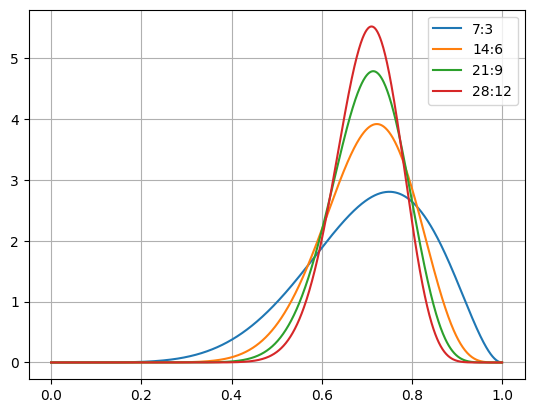

In [56]:
fig, ax = plt.subplots(1,1)
weak_cheat_alpha_base = 7
weak_cheat_beta_base =3

x = np.linspace(0, 1, 1_000)
for multiple in range(1,5):
    weak_cheat_alpha = weak_cheat_alpha_base * multiple
    weak_cheat_beta = weak_cheat_beta_base * multiple
    ax.plot(x, beta(weak_cheat_alpha, weak_cheat_beta).pdf(x), label=f"{weak_cheat_alpha}:{weak_cheat_beta}")
ax.grid(True)
ax.legend()
plt.show()

It would be reasonable for someoen who is only mildly suspicious to take a weak prior, which means a low multiple of their estimate.  In this case Beta(7,3) seems fine.

#### Part B

>  *  One person who very strongly trusts that the coin is fair and provided a 50 percent chance of coming up heads.

0.9900749705622576 confidence takes 331 pairs


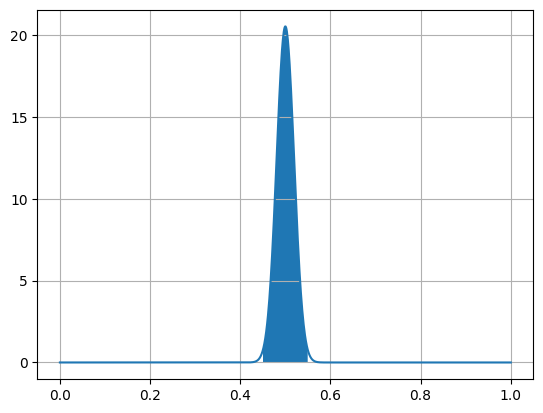

In [57]:
strong_fair_alpha_base = 1
strong_fair_beta_base = 1

margin = 0.10
tail = margin/2
target_confidence = 0.99
ratio_multiple = 1
while True:
    fair_beta = beta(ratio_multiple, ratio_multiple)
    confidence = fair_beta.cdf(.5+tail) - fair_beta.cdf(.5-tail)
    if confidence >= target_confidence:
        break
    else:
        ratio_multiple += 1
print(f"{confidence} confidence takes {ratio_multiple} pairs")

fig, ax = plt.subplots(1,1)
x = np.linspace(0, 1, 1000)
y = fair_beta.pdf(x)
ax.fill_between(x, 0, y, where= (x >.5-tail) & (x< 0.5+ tail))
ax.grid(True)
ax.plot(x, y)
plt.show()
    




If someone was even just 99% sure that a coin was "fair," coming up heads between 45% and 55% of the time, they would take a prior of Beta(331,331).

#### Part C

>  *  One person who strongly beleives that the coin is biased to come up heads 70 percent of the time.

0.990309259786514 that the coin is unfair takes 392:168


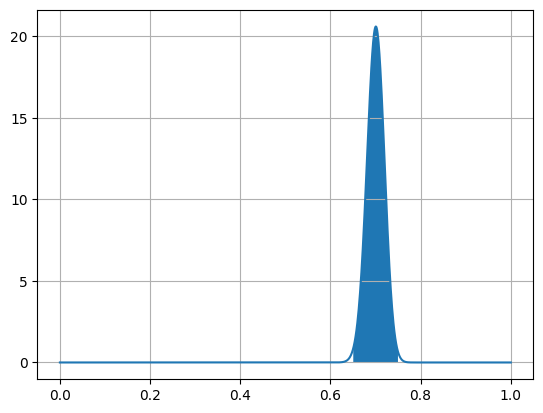

In [58]:
strong_cheat_alpha_base = 7
strong_cheat_beta_base = 3

margin = 0.10
tail = margin/2
target_confidence = 0.99
ratio_multiple = 1
while True:
    strong_cheat = beta(strong_cheat_alpha_base * ratio_multiple, strong_cheat_beta_base * ratio_multiple)
    confidence = strong_cheat.cdf(.7+tail) - strong_cheat.cdf(.7-tail)
    if confidence >= target_confidence:
        break
    else:
        ratio_multiple += 1
print(f"{confidence} that the coin is unfair takes {strong_cheat_alpha_base * ratio_multiple}:{strong_cheat_beta_base * ratio_multiple}")

fig, ax = plt.subplots(1,1)
x = np.linspace(0, 1, 1000)
y = strong_cheat.pdf(x)
ax.fill_between(x, 0, y, where= (x >.7-tail) & (x< 0.7+ tail))
ax.grid(True)
ax.plot(x, y)
plt.show()

### Exercise 2

>  2.  To test the coin, you flip it 20 more times and get 9 heads and 11 tails.  Usting the priors you calculated in the previous question, what are the updated posterior beleifs in the true rate of flipping a heads in terms of the 95 percent confidence interval?

In [59]:
new_liklihood_alpha = 9+9
new_liklihood_beta = 3+11

#### Part A

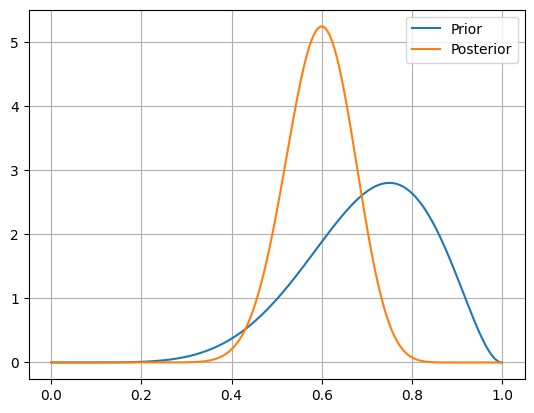

The 95% confidence interval: 0.445:0.737


In [60]:
fig, ax = plt.subplots(1,1)
weak_cheat_posterior = beta(weak_cheat_alpha_base + new_liklihood_alpha, weak_cheat_beta_base + new_liklihood_beta)
x = np.linspace(0, 1, 1000)
ax.plot(x, beta(weak_cheat_alpha_base, weak_cheat_beta_base).pdf(x), label="Prior")
ax.plot(x, weak_cheat_posterior.pdf(x), label="Posterior")
ax.grid(True)
ax.legend()
plt.show()

print(f"The 95% confidence interval: {weak_cheat_posterior.ppf(0.025):.3g}:{weak_cheat_posterior.isf(0.025):.3g}")



#### Part B

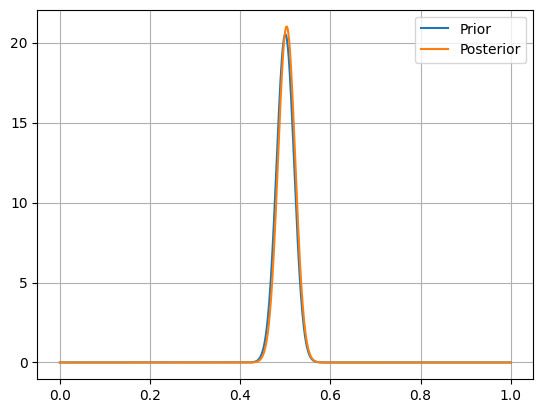

The 95% confidence interval is 0.466:0.54


(0.46571306454585154, 0.5400348906501158)

In [71]:
strong_fair_posterior_alpha, strong_fair_posterior_beta = 331 + new_liklihood_alpha, 331 + new_liklihood_beta
strong_fair_posterior = beta(strong_fair_posterior_alpha, strong_fair_posterior_beta)

fig, ax = plt.subplots(1,1)

x = np.linspace(0, 1, 1_000)
ax.plot(x, fair_beta.pdf(x), label="Prior")
ax.plot(x, strong_fair_posterior.pdf(x), label="Posterior")
ax.grid(True)
ax.legend()
plt.show()

print(f"The 95% confidence interval is {strong_fair_posterior.ppf(0.025):.3g}:{strong_fair_posterior.isf(0.025):.3g}")

I used a weaker prior, $\alpha = \beta = 331$ which was the minimum for 99% confidence that the coin was fair.  The book used a very high round number of 1,000 so it makes sense that my range is somewhat wider.

#### Part C

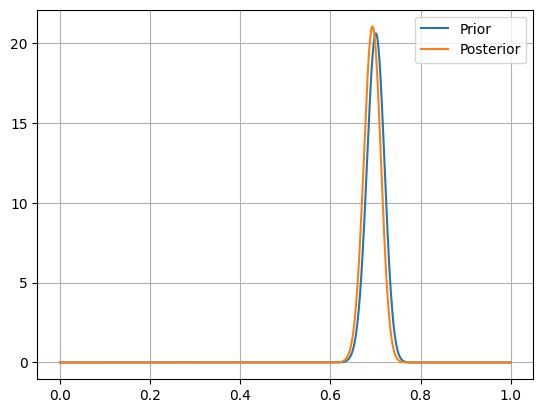

The 95% confidence interval is: 0.655:0.729


In [73]:
strong_cheat_alpha, strong_cheat_beta = strong_cheat.args
strong_cheat_posterior = beta(strong_cheat_alpha + new_liklihood_alpha, strong_cheat_beta + new_liklihood_beta)

fig, ax = plt.subplots(1,1)
x = np.linspace(0, 1, 1_000)
ax.plot(x, strong_cheat.pdf(x), label="Prior")
ax.plot(x, strong_cheat_posterior.pdf(x), label="Posterior")
ax.grid(True)
ax.legend()
plt.show()

confidence_lower_bound, confidence_upper_bound = strong_cheat_posterior.interval(0.95)
print(f"The 95% confidence interval is: {confidence_lower_bound:.3g}:{confidence_upper_bound:.3g}")